In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

main_data = pd.read_csv('backpain.csv')

In [2]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [3]:
main_data.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


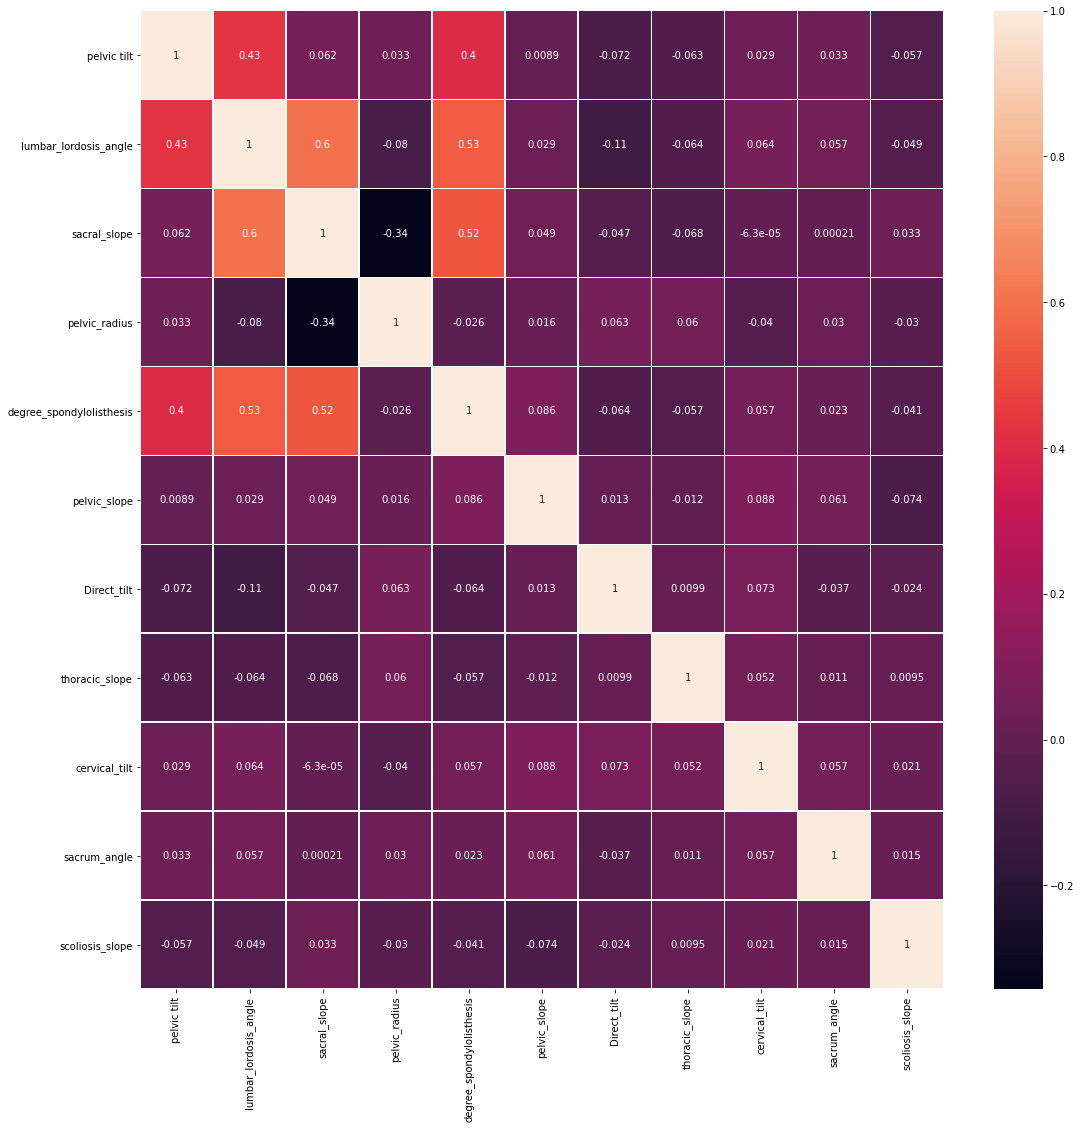

In [3]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [2]:
print(f"Rows : {main_data.shape[0]} x Columns : {main_data.shape[1]}")

np.random.seed(1)
main_data.sample(n=10)

Rows : 310 x Columns : 12


,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
pelvic_incidence,,,,,,,,,,,,
67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0.855643,18.9972,12.8779,11.82259,-14.550070,42.2698,Abnormal
63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,0.577847,11.2203,14.0752,7.38995,6.635051,13.4565,Normal
91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0.560010,13.9263,12.1023,15.45998,-11.179414,30.3160,Abnormal
72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0.267292,26.9716,18.3111,13.67428,-19.605044,22.7590,Abnormal
54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,0.440722,30.0719,19.2053,14.52239,-18.805512,33.1902,Abnormal
70.399308,13.469986,61.200000,56.929322,102.337524,25.538429,0.974401,30.9297,9.5431,12.34978,6.089565,34.9908,Abnormal
33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal
72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,0.296152,7.7545,10.8824,7.23178,-2.990023,29.9404,Abnormal
84.998956,29.610098,83.352194,55.388858,126.912990,71.321175,0.998827,7.0551,9.0119,9.85541,-19.314135,43.0086,Abnormal


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 310 entries, 63.0278175 to 33.84164075
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic tilt               310 non-null    float64
 1   lumbar_lordosis_angle     310 non-null    float64
 2   sacral_slope              310 non-null    float64
 3   pelvic_radius             310 non-null    float64
 4   degree_spondylolisthesis  310 non-null    float64
 5   pelvic_slope              310 non-null    float64
 6   Direct_tilt               310 non-null    float64
 7   thoracic_slope            310 non-null    float64
 8   cervical_tilt             310 non-null    float64
 9   sacrum_angle              310 non-null    float64
 10  scoliosis_slope           310 non-null    float64
 11  Status                    310 non-null    object 
dtypes: float64(11), object(1)
memory usage: 31.5+ KB


In [4]:
nulls_series             = main_data.isna().sum()         # Get a series counting number of empty values for each column
nonnulls_series          = main_data.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
column_datatypes         = main_data.dtypes               # Get a series containing data types for each column 

nulls_count_df = pd.concat(
    [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
    axis=1,
    keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
    sort=True)
cm = sns.light_palette("red", as_cmap=True)

nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"})

,Nulls,Non-Nulls,Nulls %,Type
Direct_tilt,0,310,0.00%,float64
Status,0,310,0.00%,object
cervical_tilt,0,310,0.00%,float64
degree_spondylolisthesis,0,310,0.00%,float64
lumbar_lordosis_angle,0,310,0.00%,float64
pelvic tilt,0,310,0.00%,float64
pelvic_radius,0,310,0.00%,float64
pelvic_slope,0,310,0.00%,float64
sacral_slope,0,310,0.00%,float64
sacrum_angle,0,310,0.00%,float64


In [5]:
main_data.corr()

,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic tilt,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243
sacrum_angle,0.032859,0.057199,0.000207,0.029738,0.023021,0.060743,-0.037428,0.011354,0.057451,1.000000,0.015337


In [6]:
money_cols = []
for col_name in main_data.columns[main_data.dtypes == "object"]:
    if main_data[col_name].str.startswith('€').any():
        money_cols.append(col_name)
        
print(money_cols)

[]


In [7]:
def income_to_num(income_val):
    if isinstance(income_val, str):
        multiplier = 1
        if income_val.endswith('K'):
            multiplier = 1000
        elif income_val.endswith('M'):
            multiplier = 1000000
        return float(income_val.replace('€', '').replace('K', '').replace('M', '')) * multiplier
    else:
        return np.nan
    
for col_name in money_cols:
    main_data[col_name] = main_data[col_name].apply(income_to_num)
    
main_data[money_cols].head()

""
pelvic_incidence
63.027817
39.056951
68.832021
69.297008
49.712859


In [8]:
def position_to_num(pos_val):
    if isinstance(pos_val, str):
        return float(pos_val.split('+')[0])
    else:
        return np.nan
    
position_cols = ['LS', 'ST', 'RS', 'LW', 'LF','CF', 'RF', 'RW',
                 'LAM', 'CAM', 'RAM', 'LM','LCM', 'CM', 'RCM',
                'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
                'LCB', 'CB', 'RCB', 'RB']

for col_name in position_cols:
    main_data[col_name] = main_data[col_name].apply(position_to_num)
    
main_data[position_cols].head(200)

KeyError: 'LS'

In [ ]:
def height_to_num(height):
    if isinstance(height, str):
        splt = str(height).split("'")
        return float(splt[0]) * 12 + float(splt[1])
    else:
        return np.nan

def weight_to_num(weight):
    if isinstance(weight, str):
        return float(str(weight).replace('lbs', ''))
    else:
        return np.nan

col_transformations ={
    'Height' : height_to_num,
    'Weight' : weight_to_num
}

for k,v in col_transformations.items():
    main_data[k] = main_data[k].apply(v)
    
main_data[[*col_transformations]].head(200)

In [ ]:
main_data['Joined'] = pd.to_datetime(main_data['Joined'])
main_data['Joined Year'] = main_data['Joined'].dt.year
print(min(main_data['Joined']), min(main_data['Joined']))
main_data['Joined'].head()

In [ ]:
main_data[main_data['Joined'] == min(main_data['Joined'])]

In [ ]:
main_data['Work Rate'].head()

In [ ]:
work_rate = main_data['Work Rate'].str.split("/ ",n = 1, expand = True)
work_rate.head()

In [ ]:
main_data.drop(['Work Rate'],axis=1, inplace=True)
main_data['Workrate_Attack'] = work_rate[0]
main_data['Workrate_Defense'] = work_rate[1]
main_data.head()

In [ ]:
positiontype_to_cols = {
    'Attack'   : ['LS', 'ST', 'RS', 'LF', 'CF', 'RF'],
    'Midfield' : ['LW', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'CDM', 'RDM', 'LDM'],
    'Defense'  : ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB','RB']
}

for pos_type, colvec in positiontype_to_cols.items():
    main_data[pos_type + '_rate'] = round(main_data[colvec].mean(axis=1))
    
main_data.drop(position_cols, axis=1, inplace=True)
print(main_data.shape)

In [ ]:
data = pd.DataFrame({"Col1": [100,200,300,400], "Col2":[500,600,700,800], "Col3":[900,1000,1100,1200], "Col4":["Nature","Wildlife","Animals","Humans"]})

In [ ]:
data["Col4"].str.replace("Nature","Beauty", axis=0,, inplace=False)


In [ ]:
data

In [ ]:
data = pd.DataFrame({"Col1": [100,200,300,400], "Col2":[500,600,700,800], "Col3":[900,1000,1100,1200], "Col4":["Nature","Wildlife","Animals","Humans"]})
data

In [ ]:
data.mean(axis=1)

In [ ]:
np.mean(data, axis=1)

In [ ]:
data["Col4"].replace("Nature","Beauty", inplace=False)
# data

In [ ]:
data["Col4"].str.replace("Nature","Beauty")

In [ ]:
data

In [ ]:
data["Col5"] = data[["Col1","Col2","Col3"]].sum(axis=1)
data["Col5"]

In [ ]:
data["Col6"] = data["Col3"] - data["Col1"]
data["Col6"]

In [ ]:
data.drop(["Col2"],axis=1)

In [ ]:
data

In [ ]:
main_data.describe().T

In [ ]:
data = pd.DataFrame({"Col1": [100,200,300,400], "Col2":[500,600,700,800], "Col3":[900,1000,1100,1200], "Col4":["Nature","Wildlife","Animals","Humans"]})
data

In [ ]:
data['Col1'] * 5

In [ ]:
data['Col1'].apply(lambda x : x*5)

In [ ]:
data['Col4'].str.endswith('s').sum()

In [ ]:
type(np.nan)